In [2]:
#Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configuración de gráficos

sns.set(style="whitegrid", palette="deep")

In [4]:
# Cargar datos
data = pd.read_csv('../data/raw/avocado.csv')

In [5]:
# Vista general de los datos
print("Dimensiones del dataset:", data.shape)
print("Primeras filas del dataset:")
print(data.head())

Dimensiones del dataset: (18249, 14)
Primeras filas del dataset:
   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region

In [6]:
# Información del dataset
print("\n Información del dataset:")
data.info()


 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
print ("\n Estadísticas descriptivas:")
print(data.describe())


 Estadísticas descriptivas:
         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05

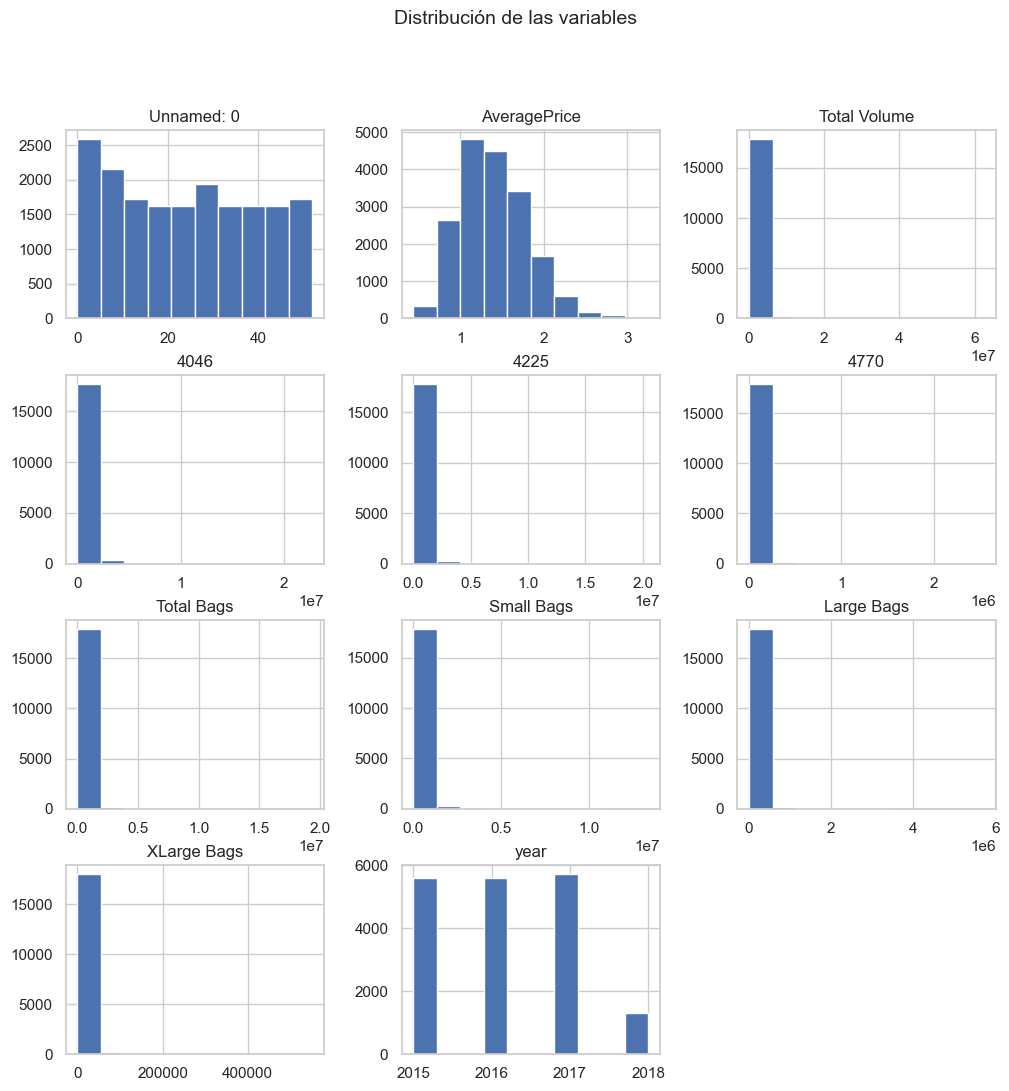

In [8]:
data.hist(figsize=(12,12))
plt.suptitle("Distribución de las variables", fontsize=14)
plt.show()

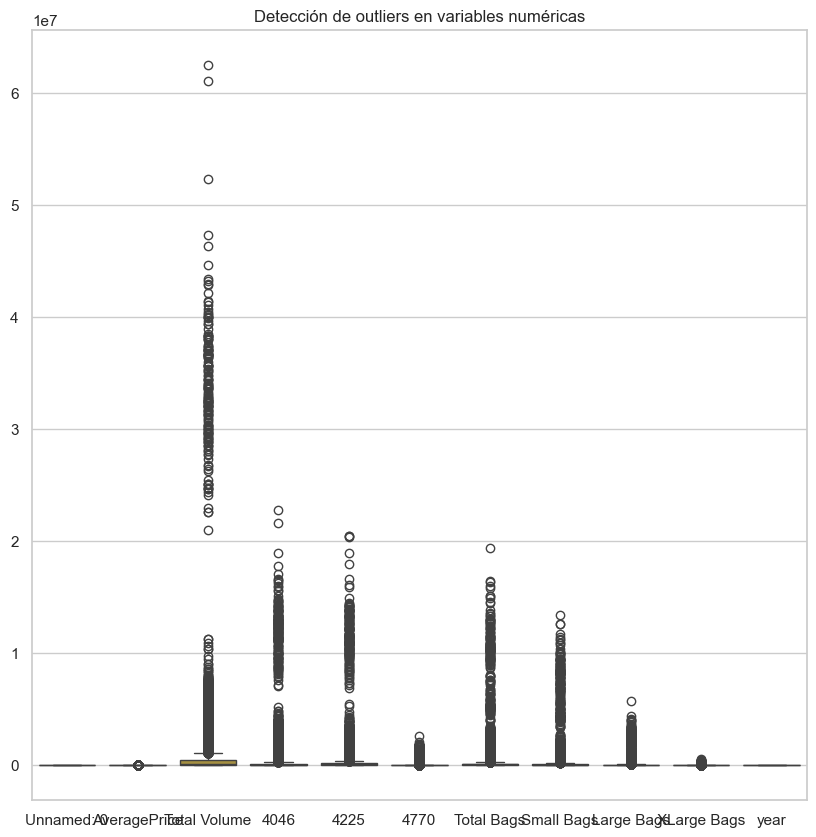

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data.select_dtypes("number"))
plt.title("Detección de outliers en variables numéricas")
plt.show()


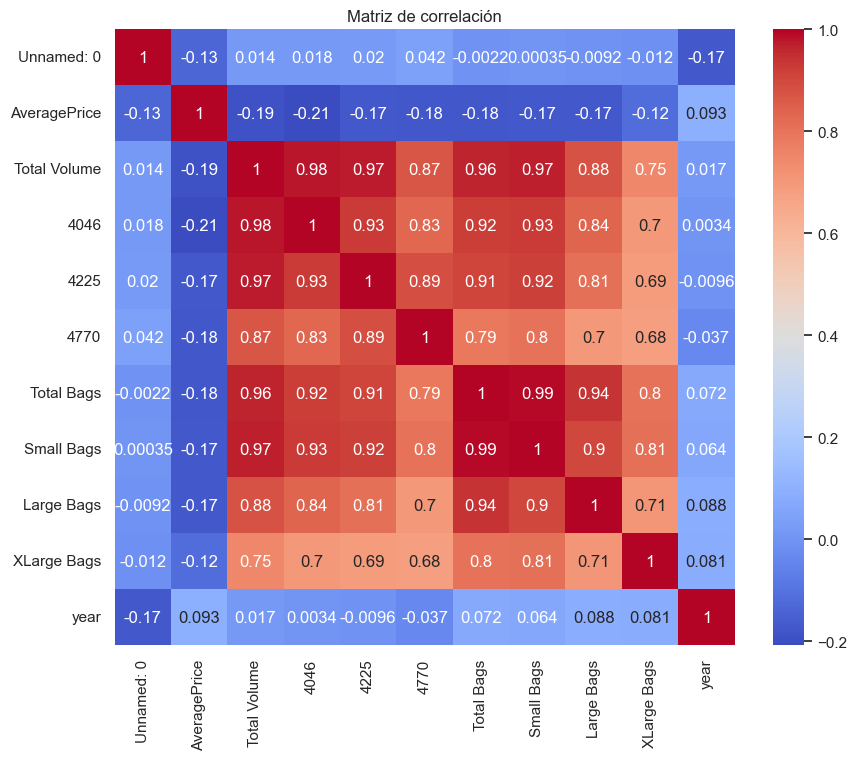

In [10]:
# Correlación entre variables
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

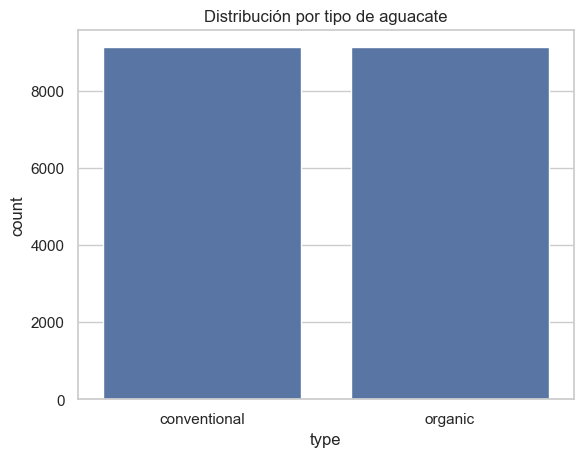

In [11]:
# Distribución por tipo de aguacate
sns.countplot(x="type", data=data)
plt.title("Distribución por tipo de aguacate")
plt.show()


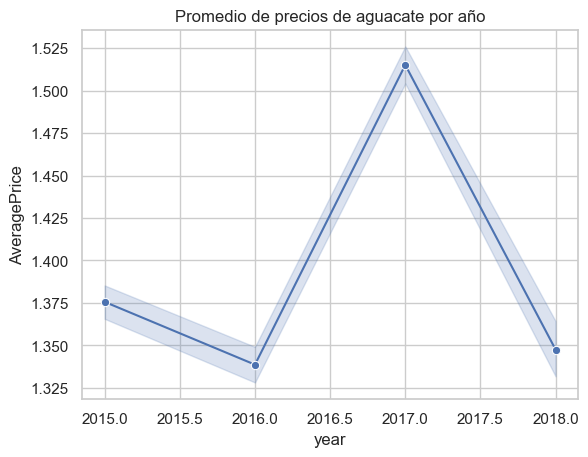

In [12]:
# Tendencia de precios por año
sns.lineplot(x="year", y="AveragePrice", data=data, marker="o")
plt.title("Promedio de precios de aguacate por año")
plt.show()

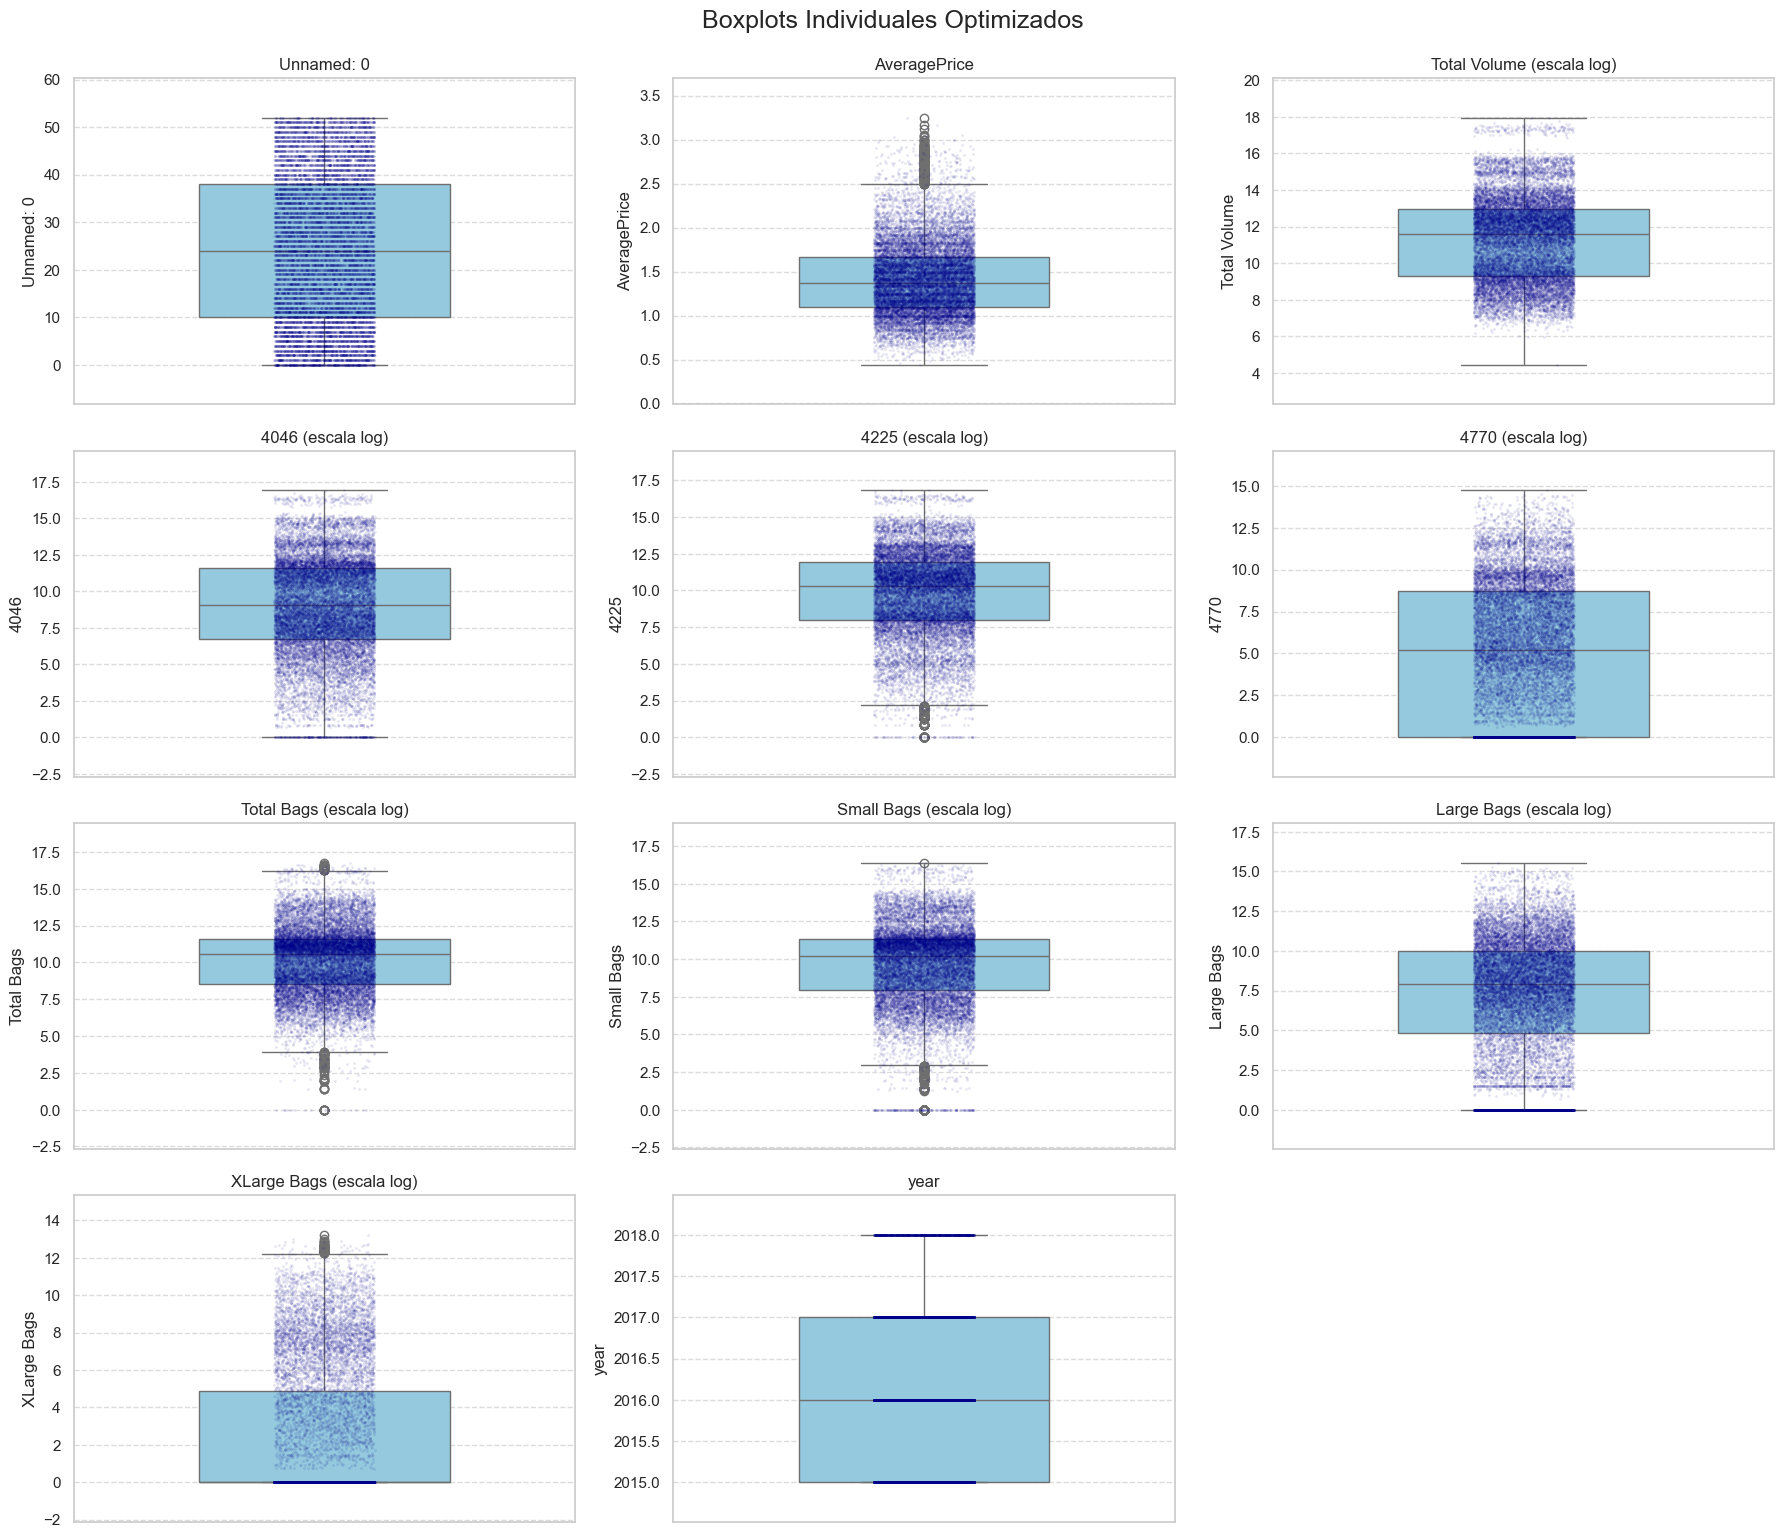

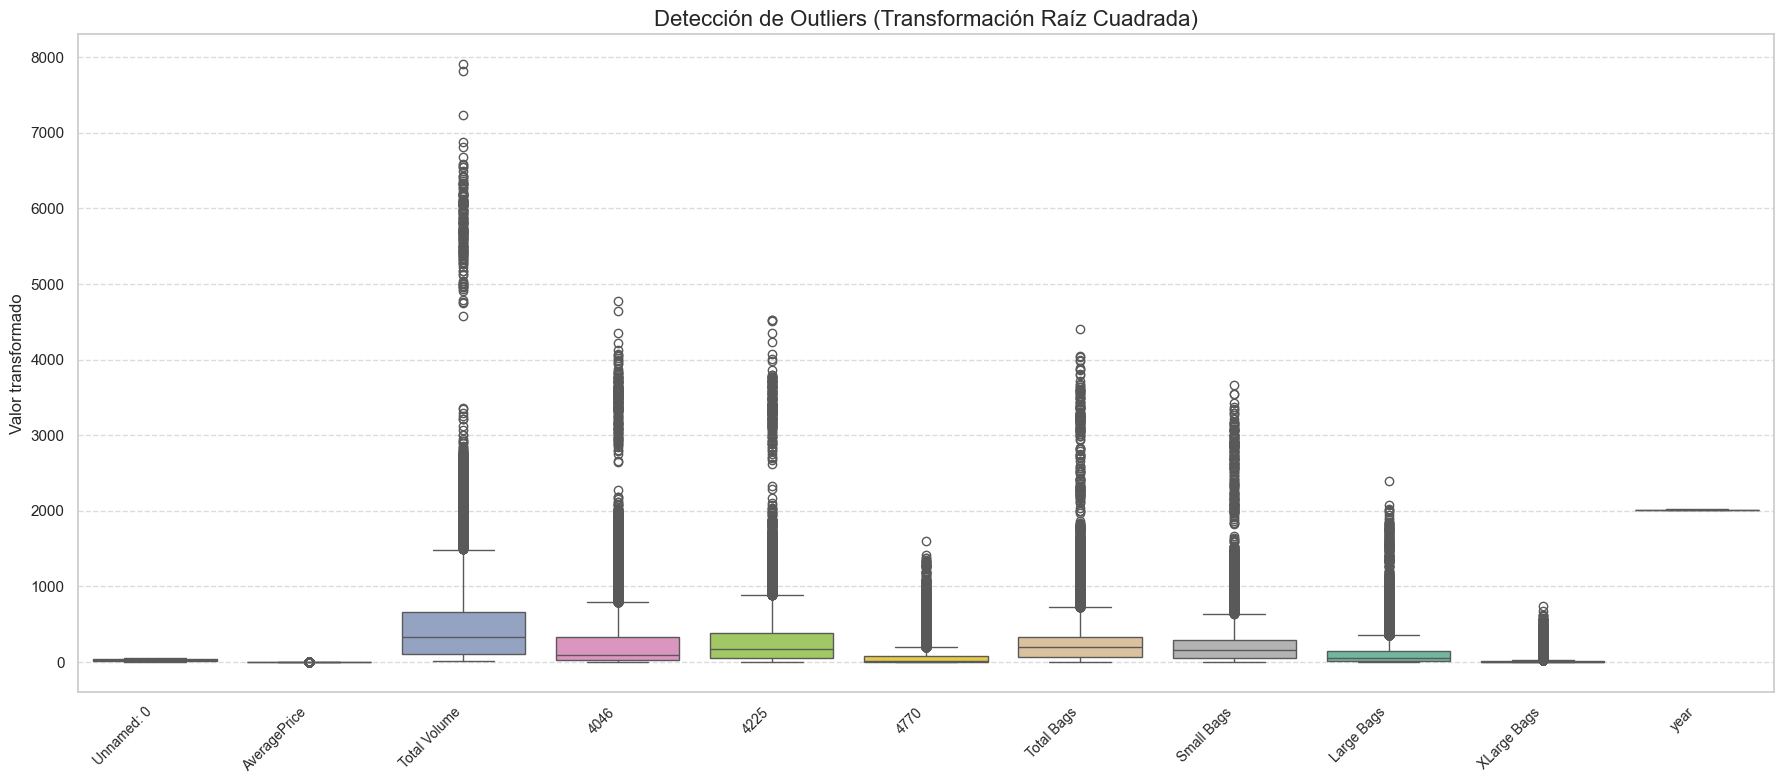

In [20]:
# Boxplots individuales optimizados para mejor visualización
# Crear una figura con varios subplots individuales para cada variable
plt.figure(figsize=(18, 15))

# Obtener lista de variables numéricas
numeric_cols = data.select_dtypes(include=['number']).columns

# Crear un subplot individual para cada variable
for i, col in enumerate(numeric_cols):
    # Crear subplot
    plt.subplot(4, 3, i+1)
    
    # Decidir si aplicar transformación logarítmica
    if col in volume_cols:
        # Para variables de volumen, usar datos transformados
        plot_data = np.log1p(data[col])
        title_suffix = " (escala log)"
    else:
        # Para otras variables, usar datos originales
        plot_data = data[col]
        title_suffix = ""
    
    # Crear boxplot individual con ajustes específicos
    sns.boxplot(y=plot_data, color="skyblue", width=0.5)
    
    # Añadir puntos para mostrar la distribución (opcional)
    sns.stripplot(y=plot_data, color='darkblue', alpha=0.1, size=2)
    
    # Configurar título y etiquetas
    plt.title(f'{col}{title_suffix}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Ajustar márgenes de los ejes para que la caja ocupe más espacio
    y_min, y_max = plt.ylim()
    range_y = y_max - y_min
    plt.ylim(y_min - range_y*0.1, y_max + range_y*0.1)

# Ajustar diseño
plt.tight_layout()
plt.suptitle("Boxplots Individuales Optimizados", fontsize=18, y=1.02)
plt.show()

# Enfoque alternativo: Transformación más agresiva para variables de volumen
plt.figure(figsize=(18, 8))

# Crear un DataFrame con transformación raíz cuadrada para visualización
data_sqrt = data.copy()
for col in volume_cols:
    data_sqrt[col] = np.sqrt(data[col])

# Boxplot con transformación raíz cuadrada
sns.boxplot(data=data_sqrt[numeric_cols], palette="Set2")
plt.title("Detección de Outliers (Transformación Raíz Cuadrada)", fontsize=16)
plt.ylabel("Valor transformado", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

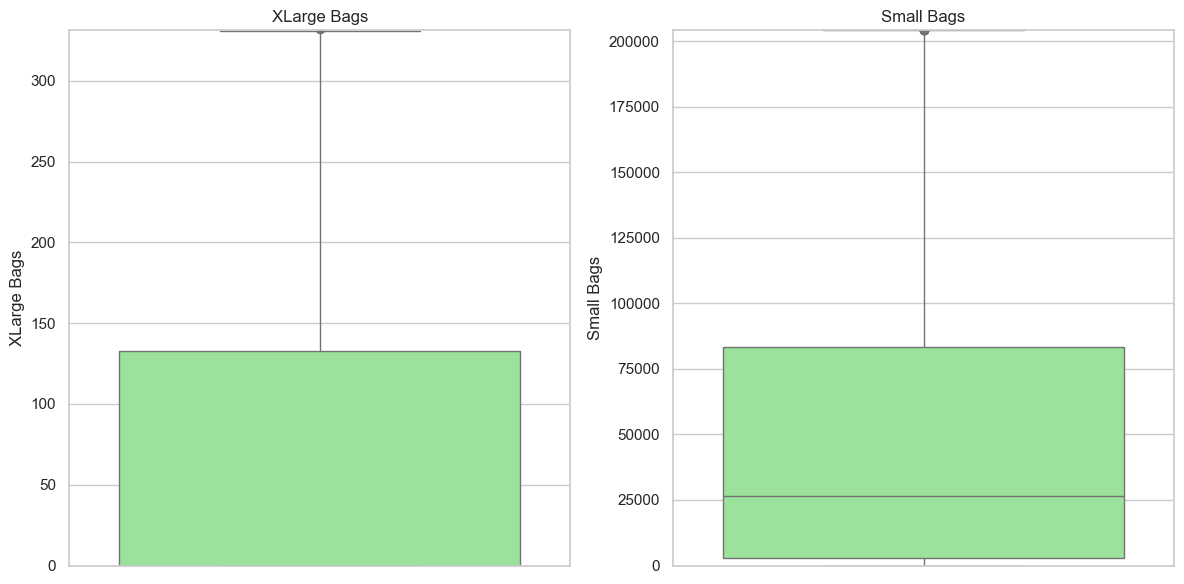

In [21]:
# Boxplots específicos para variables problemáticas con límites manuales
problem_vars = ['XLarge Bags', 'Small Bags']  # Ajusta según tus necesidades

plt.figure(figsize=(12, 6))
for i, col in enumerate(problem_vars):
    plt.subplot(1, len(problem_vars), i+1)
    sns.boxplot(y=data[col], color="lightgreen")
    plt.title(f'{col}')
    
    # Ajustar límites manualmente para eliminar outliers extremos
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    top_limit = q3 + 1.5 * iqr
    
    plt.ylim(0, top_limit)  # Limitar eje Y para ver mejor la caja
    
plt.tight_layout()
plt.show()